# IMPORTING LIBRARIES

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# LOADING DATASET

In [3]:
# Load the disaster dataset
df = pd.read_excel("emdat_country_profiles_2025_01_20.xlsx")


# CHECKING SHAPE OF DATASET

In [4]:
df.shape

(6155, 13)

In [5]:
df.head()

,Year,Country,ISO,Disaster Group,Disaster Subroup,Disaster Type,Disaster Subtype,Total Events,Total Affected,Total Deaths,"Total Damage (USD, original)","Total Damage (USD, adjusted)",CPI
0,#date +occurred,#country +name,#country +code,#cause +group,#cause +subgroup,#cause +type,#cause +subtype,#frequency,#affected +ind,#affected +ind +killed,NaN,#value +usd,NaN
1,2000,Afghanistan,AFG,Natural,Climatological,Drought,Drought,1,2580000,37,50000.0,88473,56.514291
2,2000,Algeria,DZA,Natural,Hydrological,Flood,Flash flood,1,100,28,NaN,NaN,56.514291
3,2000,Algeria,DZA,Natural,Meteorological,Storm,Storm (General),1,10,4,NaN,NaN,56.514291
4,2000,Angola,AGO,Natural,Hydrological,Flood,Flood (General),3,9011,15,NaN,NaN,56.514291


In [6]:
df.describe() #gives min, max, mean, std for numeric columns

,"Total Damage (USD, original)",CPI
count,2.102000e+03,5917.000000
mean,1.734861e+09,74.298162
std,8.743446e+09,11.913825
min,2.000000e+03,56.514291
25%,2.000000e+07,64.092740
50%,1.300000e+08,73.822751
75%,8.042500e+08,82.410668
max,2.100000e+11,100.000000


# Check for missing values


In [7]:

df.isnull().sum()

Year                               0
Country                            0
ISO                                0
Disaster Group                     0
Disaster Subroup                   0
Disaster Type                      0
Disaster Subtype                   0
Total Events                       0
Total Affected                  1182
Total Deaths                    1791
Total Damage (USD, original)    4053
Total Damage (USD, adjusted)    4096
CPI                              238
dtype: int64

# Check percentage of missing values per column

In [8]:
missing_percent = df.isnull().sum() / len(df) * 100
print(missing_percent.sort_values(ascending=False))


Total Damage (USD, adjusted)    66.547522
Total Damage (USD, original)    65.848903
Total Deaths                    29.098294
Total Affected                  19.203899
CPI                              3.866775
Disaster Subroup                 0.000000
Disaster Group                   0.000000
ISO                              0.000000
Country                          0.000000
Year                             0.000000
Total Events                     0.000000
Disaster Type                    0.000000
Disaster Subtype                 0.000000
dtype: float64


# Decide how to handle missing values

## Option A: Drop columns with too many missing values

In [9]:
threshold = 50  # if more than 50% missing
df = df[df.columns[missing_percent < threshold]]

In [10]:
df.shape #as we have seen that the number of columns have reduced after removing those with more than 50% missing values

(6155, 11)

## Option B: Drop rows with missing essential data (like Country, Year)

In [11]:
df = df.dropna(subset=['Country', 'Year'])

In [12]:
df.shape #checking the shape after dropping rows with missing 'Country' or 'Year'

(6155, 11)

# Option C: Fill numeric missing values with 0 or mean (example: Total affected)

In [13]:
# numeric_cols = df.select_dtypes(include=['int64','float64']).columns
# df[numeric_cols] = df[numeric_cols].fillna(0)

In [14]:
# Step 1: Identify numeric columns
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
print("Numeric columns:", numeric_cols)

# Step 2: Check missing values in numeric columns BEFORE filling
print("Missing values BEFORE filling:")
print(df[numeric_cols].isnull().sum())

# Step 3: Fill missing values with 0 (or you could use mean)
df[numeric_cols] = df[numeric_cols].fillna(0)

Numeric columns: Index(['CPI'], dtype='object')
Missing values BEFORE filling:
CPI    238
dtype: int64


In [15]:
# Step 4: Check missing values AFTER filling
print("Missing values AFTER filling:")
print(df[numeric_cols].isnull().sum())

Missing values AFTER filling:
CPI    0
dtype: int64


# Univariate Analysis

# 1.Categorical Columns (like Disaster Type, Country, Region)

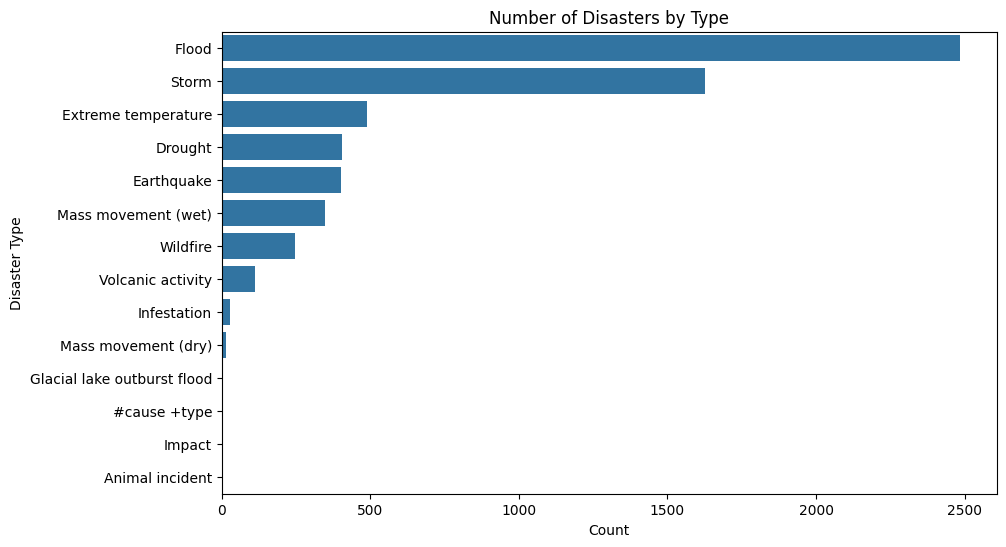

In [16]:
# Count plot for Disaster Type
plt.figure(figsize=(10,6))
sns.countplot(y='Disaster Type', data=df, order=df['Disaster Type'].value_counts().index)
plt.title('Number of Disasters by Type')
plt.xlabel('Count')
plt.ylabel('Disaster Type')
plt.show()

# Count plot for Region (if exists)
if 'Region' in df.columns:
    plt.figure(figsize=(10,6))
    sns.countplot(y='Region', data=df, order=df['Region'].value_counts().index)
    plt.title('Number of Disasters by Region')
    plt.xlabel('Count')
    plt.ylabel('Region')
    plt.show()

# 2.Numeric Columns (like Total affected, Deaths, Damages)

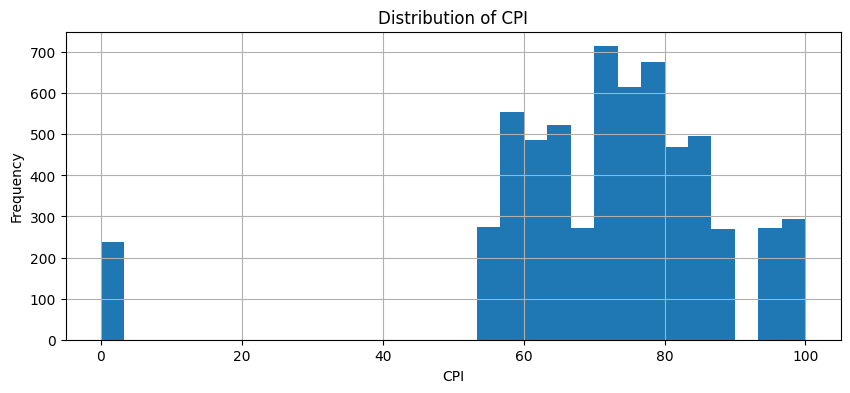

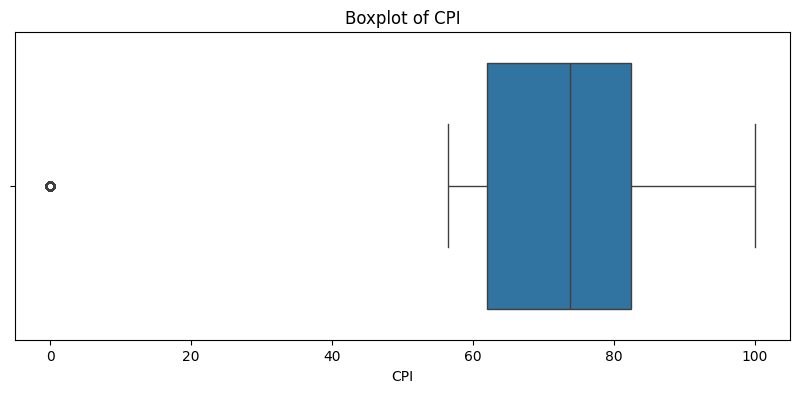

In [17]:
# Histograms for numeric columns
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(10,4))
    df[col].hist(bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Boxplots to detect outliers
for col in numeric_cols:
    plt.figure(figsize=(10,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


# Bivariate Analysis

# Country vs Total Affected / Deaths

In [18]:
print(df['Total Affected'].dtype) #If it shows object, it means the column is not numeric

object


### now we will clean the column and convert to numeric

In [19]:
# Remove commas and convert to numeric, invalid values become NaN
df['Total Affected'] = pd.to_numeric(df['Total Affected'].astype(str).str.replace(',', '').str.strip(), errors='coerce')

# Optional: fill NaN with 0 (if you want)
df['Total Affected'] = df['Total Affected'].fillna(0)

# Check again
print(df['Total Affected'].dtype)
print(df['Total Affected'].head())


float64
0          0.0
1    2580000.0
2        100.0
3         10.0
4       9011.0
Name: Total Affected, dtype: float64


# here the the above two code boxes are used because the column 'Total Affected'  contains strings instead of numeric values, so Python cannot sort them. 

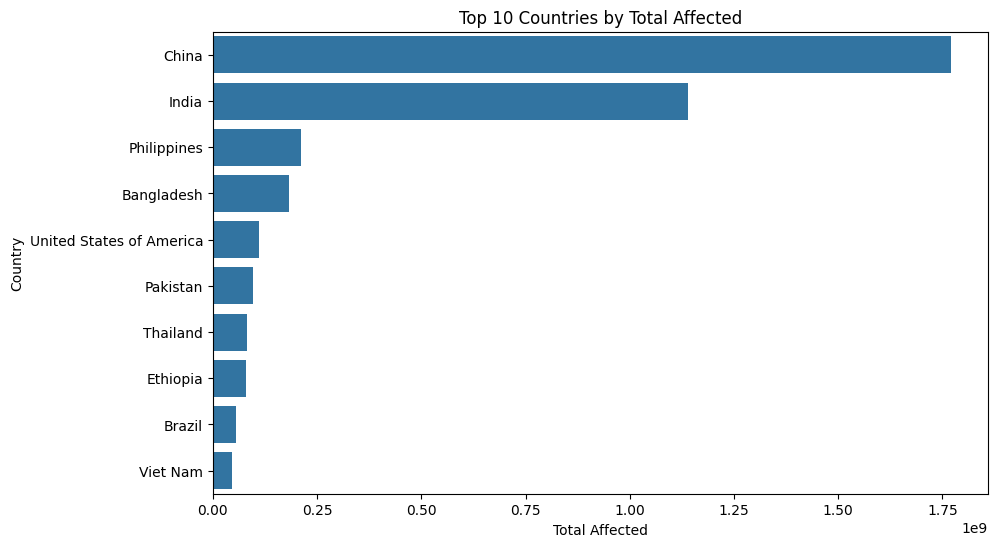

In [20]:
# Top 10 countries by total affected
top_affected = df.groupby('Country')['Total Affected'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_affected.values, y=top_affected.index)
plt.title('Top 10 Countries by Total Affected')
plt.xlabel('Total Affected')
plt.ylabel('Country')
plt.show()

In [21]:
# Remove commas and convert to numeric, invalid values become NaN
df['Total Deaths'] = pd.to_numeric(df['Total Deaths'].astype(str).str.replace(',', '').str.strip(), errors='coerce')

# Optional: fill NaN with 0 (if you want)
df['Total Deaths'] = df['Total Deaths'].fillna(0)

# Check again
print(df['Total Deaths'].dtype)
print(df['Total Deaths'].head())

float64
0     0.0
1    37.0
2    28.0
3     4.0
4    15.0
Name: Total Deaths, dtype: float64


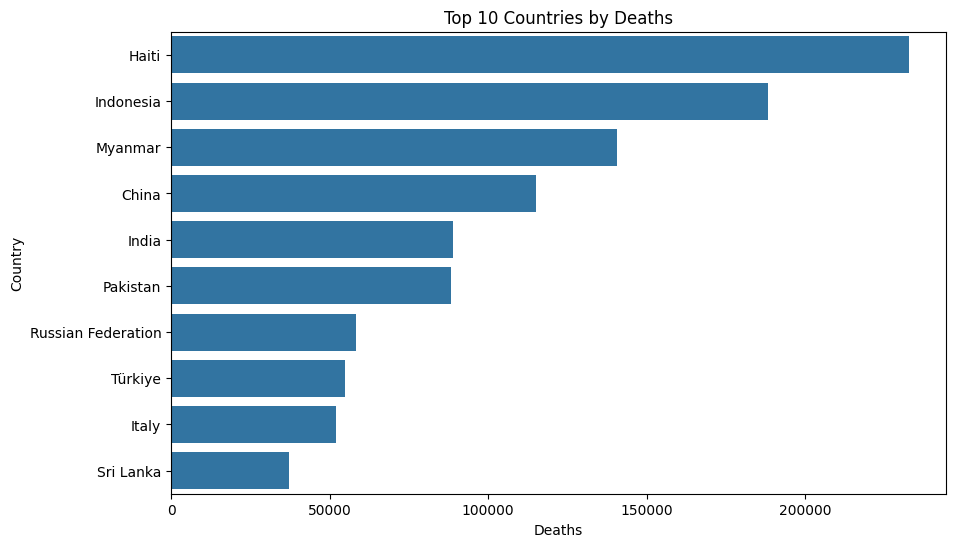

In [22]:
# Top 10 countries by deaths
top_deaths = df.groupby('Country')['Total Deaths'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_deaths.values, y=top_deaths.index)
plt.title('Top 10 Countries by Deaths')
plt.xlabel('Deaths')
plt.ylabel('Country')
plt.show()

# Disaster Type vs Total Affected

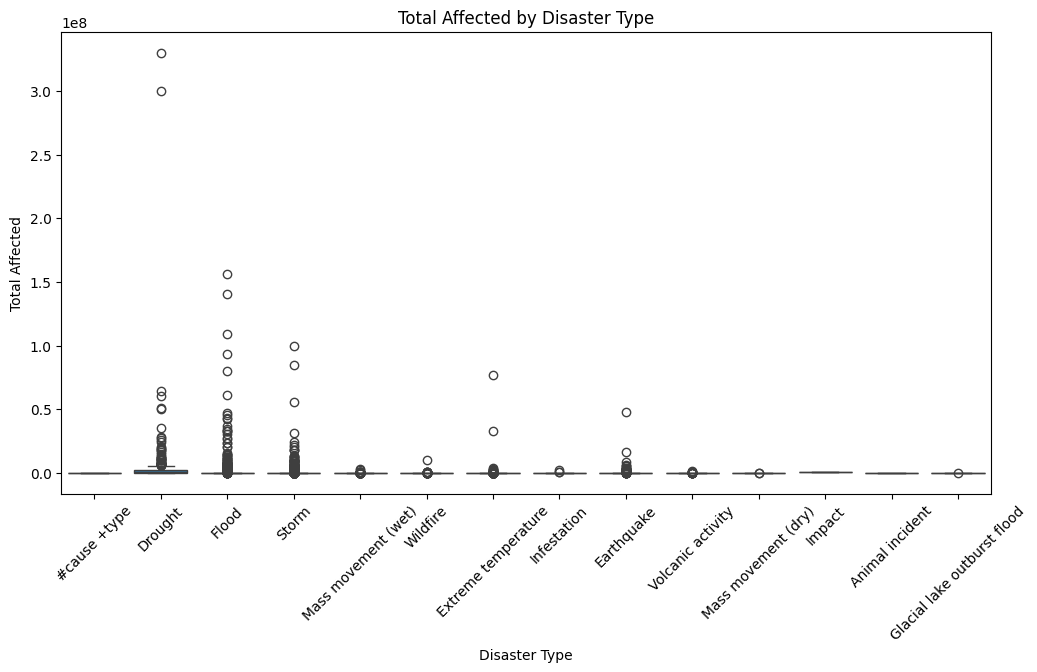

In [23]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Disaster Type', y='Total Affected', data=df)
plt.xticks(rotation=45)
plt.title('Total Affected by Disaster Type')
plt.xlabel('Disaster Type')
plt.ylabel('Total Affected')
plt.show()


### Disaster Type vs Deaths

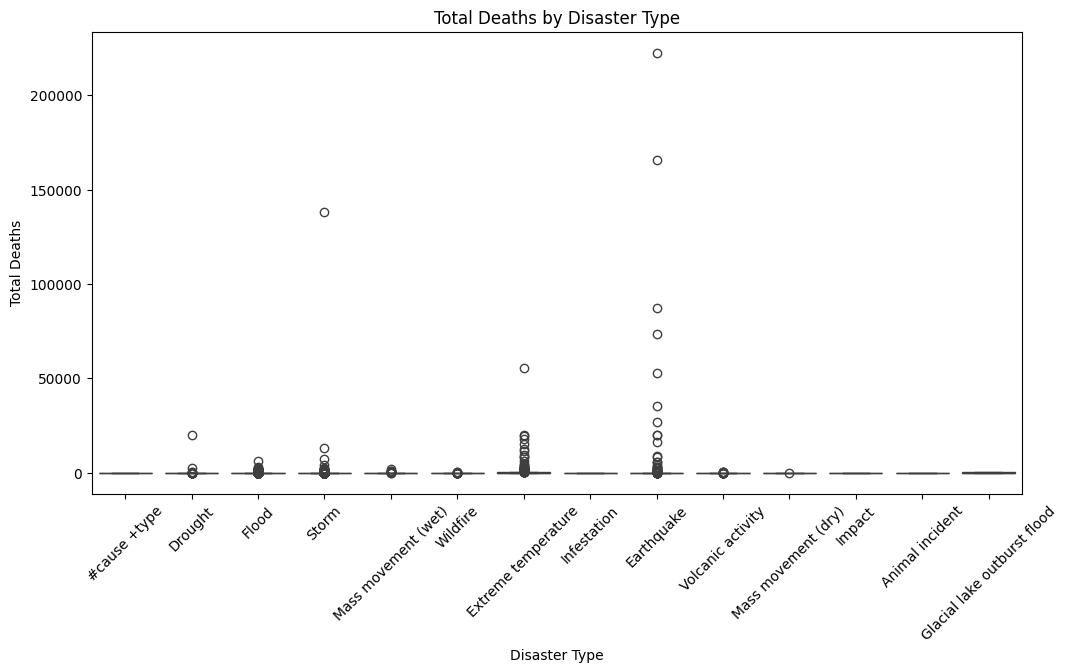

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Disaster Type', y='Total Deaths', data=df)
plt.xticks(rotation=45)
plt.title('Total Deaths by Disaster Type')
plt.xlabel('Disaster Type')
plt.ylabel('Total Deaths')
plt.show()


### Year vs Number of Disasters

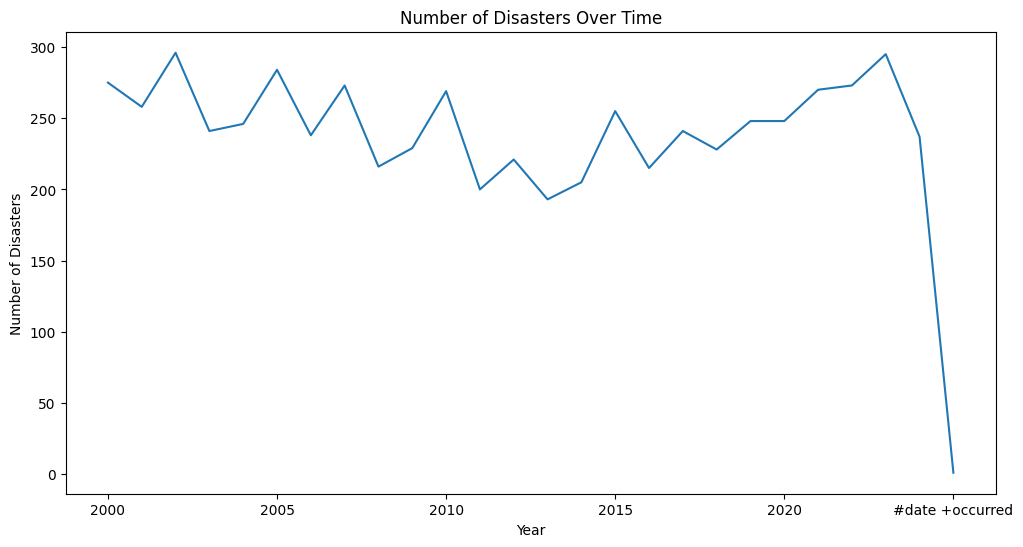

In [25]:
plt.figure(figsize=(12,6))
df.groupby('Year').size().plot(kind='line')
plt.title('Number of Disasters Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.show()


# Multivariate Analysis

### Disaster Type × Year (Trend by Disaster Type)

<Figure size 1200x600 with 0 Axes>

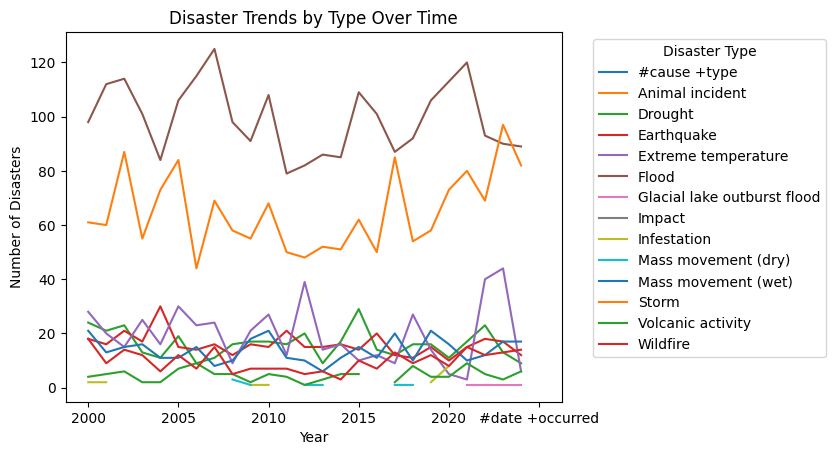

In [29]:
plt.figure(figsize=(12,6))
df.groupby(['Year', 'Disaster Type']).size().unstack().plot()
plt.title('Disaster Trends by Type Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.legend(title='Disaster Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [30]:
df.columns

Index(['Year', 'Country', 'ISO', 'Disaster Group', 'Disaster Subroup',
       'Disaster Type', 'Disaster Subtype', 'Total Events', 'Total Affected',
       'Total Deaths', 'CPI'],
      dtype='object')

### Correlation Between Numeric Variables

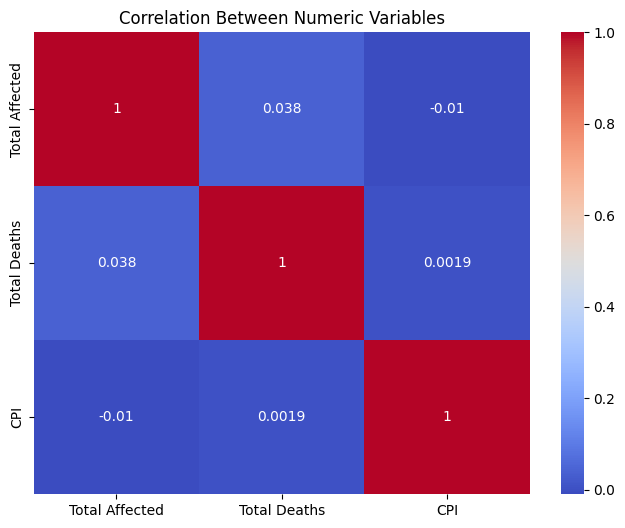

In [31]:
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(8,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Numeric Variables')
plt.show()


# Key Insights

### Sample Insights (EM-DAT)

1. Floods and storms are the most frequent disaster types globally.

2. Earthquakes and floods cause the highest number of affected people and deaths.

3. A small number of countries account for a disproportionately large share of total affected population.

4. Disaster occurrences show an increasing trend over recent decades.

5. Certain regions are more vulnerable to specific disaster types.